In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from hol.wpm_ratios import WPMRatios

year1 = 1750
year2 = 1920

ratios = WPMRatios(year1, year2)

### Raw ratio series

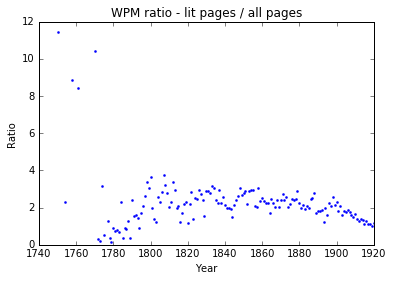

In [2]:
series = ratios.ratios['burke']

plt.title('WPM ratio - lit pages / all pages')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.ylim(0, 12)

plt.plot(
    *zip(*series.items()),
    linestyle='none',
    marker='.',
    markersize=4,
)

### Cleaned series

[False  True False False False False False  True False  True False False
  True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
-0.177238794081


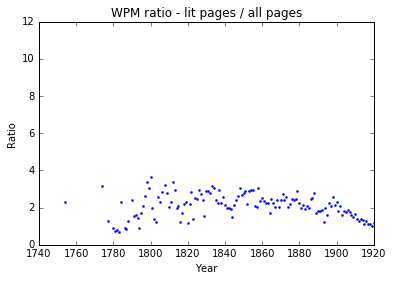

In [4]:
import numpy as np

from collections import OrderedDict
from sklearn.covariance import EllipticEnvelope
from scipy import stats

X = np.array(list(series.values()))[:, np.newaxis]

ee = EllipticEnvelope()
ee.fit(X)

y_pred = ee.decision_function(X).ravel()
threshold = stats.scoreatpercentile(y_pred, len(series) * 0.05)
y_pred = y_pred > threshold

print(y_pred)
print(threshold)

cleaned = OrderedDict()
for (token, ratio), inlier in zip(series.items(), y_pred):
    if inlier:
        cleaned[token] = ratio
        
plt.title('WPM ratio - lit pages / all pages')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.ylim(0, 12)

plt.plot(
    *zip(*cleaned.items()),
    linestyle='none',
    marker='.',
    markersize=4,
)

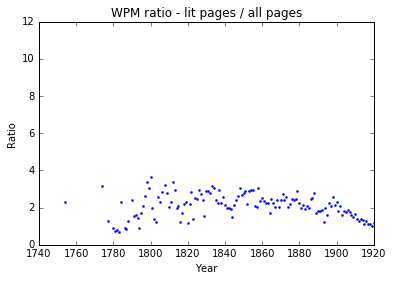

In [3]:
series = ratios.clean_series('burke')

plt.title('WPM ratio - lit pages / all pages')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.ylim(0, 12)

plt.plot(
    *zip(*series.items()),
    linestyle='none',
    marker='.',
    markersize=4,
)